In [1]:
# импортируем постоянно нужные пакеты
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
! pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d mssmartypants/rice-type-classification

! unzip rice-type-classification.zip

Saving kaggle.json to kaggle.json
100% 888k/888k [00:00<00:00, 1.80MB/s]
100% 888k/888k [00:00<00:00, 1.80MB/s]
Archive:  rice-type-classification.zip
  inflating: riceClassification.csv  


In [3]:
df = pd.read_csv('riceClassification.csv')
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [5]:
print(df["Class"].nunique())

2


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 11].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Задание 4

1. Применить один из бустовых классификаторов к своей собственной задаче классификации, визуализировать оценку важности признаков

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [14]:
# import pandas as pd

# feature_names = model.feature_names

In [15]:
feature_names = df.columns.tolist()

del feature_names[0]

In [16]:
feature_names

['Area',
 'MajorAxisLength',
 'MinorAxisLength',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Perimeter',
 'Roundness',
 'AspectRation',
 'Class']

In [17]:
# Далее мы создадим объект GradientBoostingClassifier и обучим его на обучающем наборе данных
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

GradientBoostingClassifier()

## визуализировать оценку важности признаков

In [18]:
# Чтобы визуализировать оценку важности признаков, мы можем создать датафрейм с именами признаков и соответствующими значениями важности:
feature_importance = pd.DataFrame({'feature_name': feature_names, 'importance': clf.feature_importances_})
print(feature_importance)

       feature_name    importance
0              Area  5.736300e-02
1   MajorAxisLength  2.073526e-06
2   MinorAxisLength -2.288917e-16
3      Eccentricity  9.425783e-01
4        ConvexArea  2.132310e-05
5     EquivDiameter  3.445186e-06
6            Extent  1.081703e-05
7         Perimeter -1.855823e-16
8         Roundness  2.592440e-16
9      AspectRation  1.987949e-05
10            Class  1.120531e-06


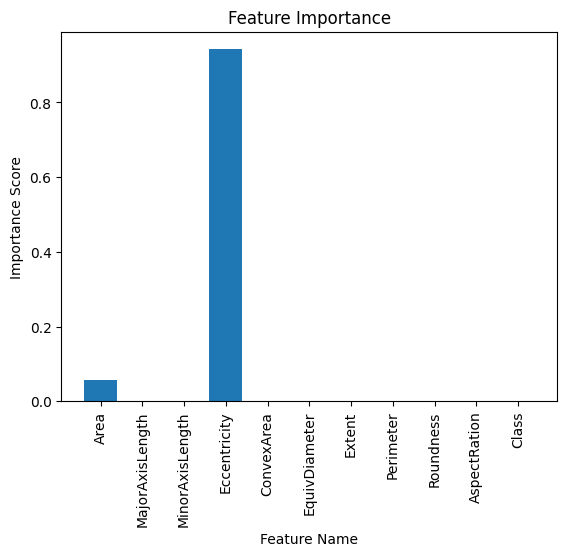

In [19]:
# Мы можем построить столбчатую диаграмму для визуализации оценки важности признаков:
import matplotlib.pyplot as plt

plt.bar(feature_importance['feature_name'], feature_importance['importance'])
plt.title('Feature Importance')
plt.xlabel('Feature Name')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()